In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# DATA IMPORTING

In [4]:
dataset = pd.read_excel('Kaggle_Sirio_Libanes_ICU_Prediction.xlsx')

In [5]:
dataset.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                 0.0                 1.0                 1.0  0.0   
1                 0.0                 1.0                 1.0  0.0   
2                 0.0                 1.0                 1.0  0.0   
3                 0.0                 1.0                 1.0  0.0   
4                 0.0                 1.0                 1.0  0.0   

   IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                0.0    1.0             NaN           NaN          NaN   
1                0.0    1.0             NaN           NaN          NaN   
2                0.0    1.0        0.605263      0.605263     0.605263   
3                0.0    1.0             NaN           NaN          NaN   
4                0.0    1.0        0.000000      0.000000     0.000000   

   ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0          NaN           NaN                 NaN               NaN   
1          NaN           NaN                 NaN               NaN   
2     0.605263          -1.0           -1.000000         -1.000000   
3          NaN           NaN                 NaN               NaN   
4     0.000000          -1.0           -0.871658         -0.871658   

   BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  \
0              NaN              NaN               NaN               NaN   
1              NaN              NaN               NaN               NaN   
2        -1.000000        -1.000000              -1.0         -1.000000   
3              NaN              NaN               NaN               NaN   
4        -0.871658        -0.871658              -1.0         -0.863874   

   BE_VENOUS_MEAN  BE_VENOUS_MIN  BE_VENOUS_MAX  BE_VENOUS_DIFF  \
0             NaN            NaN            NaN             NaN   
1             NaN            NaN            NaN             NaN   
2       -1.000000      -1.000000      -1.000000            -1.0   
3             NaN            NaN            NaN             NaN   
4       -0.863874      -0.863874      -0.863874            -1.0   

   BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  \
0                  NaN                NaN               NaN               NaN   
1                  NaN                NaN               NaN               NaN   
2            -0.317073          -0.317073         -0.317073         -0.317073   
3                  NaN                NaN               NaN               NaN   
4            -0.317073          -0.317073         -0.317073         -0.317073   

   BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  \
0                NaN                NaN              NaN             NaN   
1                NaN                NaN              NaN             NaN   
2               -1.0          -0.317073        -0.317073       -0.317073   
3                NaN                NaN              NaN             NaN   
4               -1.0          -0.414634        -0.414634       -0.414634   

   BIC_VENOUS_MAX  BIC_VENOUS_DIFF  BILLIRUBIN_MEDIAN  BILLIRUBIN_MEAN  \
0             NaN              NaN                NaN   

# data information

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


# EDA

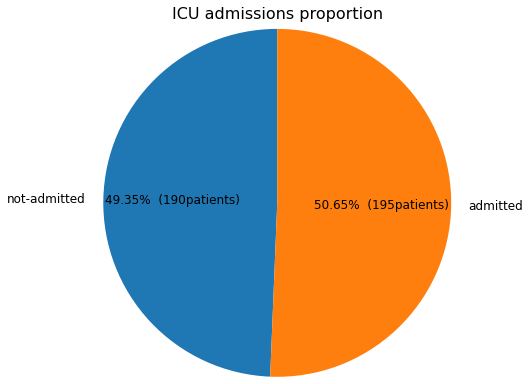

In [7]:
ICU_prop = dataset[dataset['WINDOW'] == 'ABOVE_12']
ICU_prop_main = ICU_prop.groupby('ICU')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
labels = ["not-admitted", "admitted"]
plt.title('ICU admissions proportion', fontdict= {'fontsize' : 16}, pad=75)
plt.pie(ICU_prop_main['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(ICU_prop_main['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

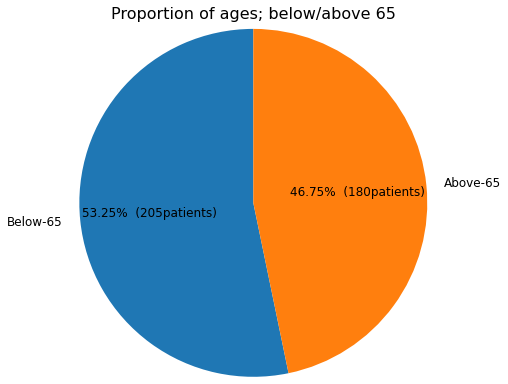

In [8]:
prop_65 = ICU_prop.groupby('AGE_ABOVE65')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
labels = ["Below-65", "Above-65"]
plt.title('Proportion of ages; below/above 65', fontdict= {'fontsize' : 16}, pad=75)
plt.pie(prop_65['PATIENT_VISIT_IDENTIFIER'],textprops={'fontsize': 12},radius =2, labels = labels, startangle=90, autopct=lambda p : '{:.2f}%  ({:,.0f}patients)'.format(p,p * sum(prop_65['PATIENT_VISIT_IDENTIFIER'])/100))
plt.show()

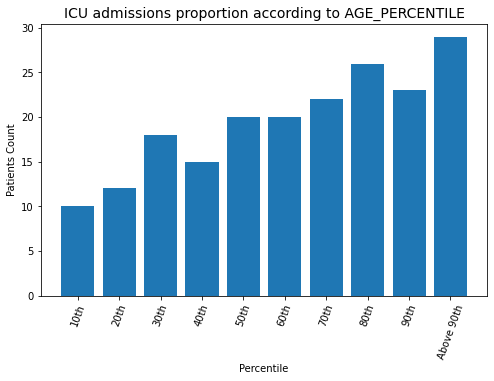

In [9]:
AGE_prop_percentil = ICU_prop[ICU_prop['ICU'] == 1]
AGE_prop_percentil = AGE_prop_percentil.groupby('AGE_PERCENTIL')['PATIENT_VISIT_IDENTIFIER'].count().reset_index()
AGE_prop_percentil.head()
plt.figure(figsize=(8,5))
plt.bar(AGE_prop_percentil["AGE_PERCENTIL"],AGE_prop_percentil["PATIENT_VISIT_IDENTIFIER"])
plt.xticks(rotation = 70)
plt.ylabel("Patients Count")
plt.xlabel("Percentile")
plt.title('ICU admissions proportion according to AGE_PERCENTILE', fontdict= {'fontsize' : 14})
plt.show()

In [10]:
dataset.shape

(1925, 231)

In [11]:
df_admitted = (dataset.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum()>0).reset_index()*1
df_admitted.columns = ["PATIENT_VISIT_IDENTIFIER", "ICU_SUM"]

In [12]:
dataset_admitted = pd.merge(dataset, df_admitted, on = "PATIENT_VISIT_IDENTIFIER")

# NULL VALUE CHECKING AND FILLING

In [13]:
dataset_admitted.fillna(method='ffill', inplace = True)
dataset_admitted.fillna(method='bfill', inplace = True)

In [14]:
dataset_admitted.isnull().any().any()

False

In [15]:
dataset_admitted.corr()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  \
PATIENT_VISIT_IDENTIFIER                          1.000000    -0.030727   
AGE_ABOVE65                                      -0.030727     1.000000   
GENDER                                            0.059772     0.049744   
DISEASE GROUPING 1                                0.076320     0.267472   
DISEASE GROUPING 2                                0.044839     0.067804   
DISEASE GROUPING 3                                0.040954     0.158191   
DISEASE GROUPING 4                               -0.017036     0.016719   
DISEASE GROUPING 5                                0.009198     0.305579   
DISEASE GROUPING 6                                0.014369    -0.015180   
HTN                                              -0.015803     0.320144   
IMMUNOCOMPROMISED                                 0.011433     0.153804   
OTHER                                             0.033077     0.073438   
ALBUMIN_MEDIAN                                    0.035667    -0.139059   
ALBUMIN_MEAN                                      0.035667    -0.139059   
ALBUMIN_MIN                                       0.035667    -0.139059   
ALBUMIN_MAX                                       0.035667    -0.139059   
ALBUMIN_DIFF                                           NaN          NaN   
BE_ARTERIAL_MEDIAN                               -0.023082     0.078336   
BE_ARTERIAL_MEAN                                 -0.023082     0.078336   
BE_ARTERIAL_MIN                                  -0.023082     0.078336   
BE_ARTERIAL_MAX                                  -0.023082     0.078336   
BE_ARTERIAL_DIFF                                       NaN          NaN   
BE_VENOUS_MEDIAN                                  0.018382     0.101218   
BE_VENOUS_MEAN                                    0.018382     0.101218   
BE_VENOUS_MIN                                     0.018382     0.101218   
BE_VENOUS_MAX                                     0.018382     0.101218   
BE_VENOUS_DIFF                                         NaN          NaN   
BIC_ARTERIAL_MEDIAN                               0.007673     0.006352   
BIC_ARTERIAL_MEAN                                 0.007673     0.006352   
BIC_ARTERIAL_MIN                                  0.007673     0.006352   
BIC_ARTERIAL_MAX                                  0.007673     0.006352   
BIC_ARTERIAL_DIFF                                      NaN          NaN   
BIC_VENOUS_MEDIAN                                 0.020257     0.016695   
BIC_VENOUS_MEAN                                   0.020257     0.016695   
BIC_VENOUS_MIN                                    0.020257     0.016695   
BIC_VENOUS_MAX                                    0.020257     0.016695   
BIC_VENOUS_DIFF                                        NaN          NaN   
BILLIRUBIN_MEDIAN                                -0.026176     0.042785   
BILLIRUBIN_MEAN                                  -0.026176     0.042785   
BILLIRUBIN_MIN                                   -0.026176     0.042785   
BILLIRUBIN_MAX                                   -0.026176     0.042785   
BILLIRUBIN_DIFF                                        NaN          NaN   
BLAST_MEDIAN                                      0.013736     0.041886   
BLAST_MEAN                                        0.013736     0.041886   
BLAST_MIN                                         0.013736     0.041886   
BLAST_MAX                                         0.013736     0.041886   
BLAST_DIFF                                             NaN          NaN   
CALCIUM_MEDIAN                                    0.040964    -0.099023   
CALCIUM_MEAN                                      0.040964    -0.099023   
CALCIUM_MIN                                       0.040964    -0.099023   
CALCIUM_MAX                                       0.040964    -0.099023   
CALCIUM_DIFF                                           NaN          NaN   
CREATININ_MEDIAN                                  0.004947 

In [16]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.heatmap(dataset_admitted.corr(), annot = True, fmt='.2g',cmap= 'Spectral')

<AxesSubplot:>

# REMOVING NON REQUIRED COLUMNS

In [17]:
dataset_admitted=dataset_admitted.drop("AGE_PERCENTIL", axis=1)

In [18]:
dataset_admitted.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
0                         0            1       0                 0.0   
1                         0            1       0                 0.0   
2                         0            1       0                 0.0   
3                         0            1       0                 0.0   
4                         0            1       0                 0.0   

   DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
0                 1.0                 1.0  0.0                0.0    1.0   
1                 1.0                 1.0  0.0                0.0    1.0   
2                 1.0                 1.0  0.0                0.0    1.0   
3                 1.0                 1.0  0.0                0.0    1.0   
4                 1.0                 1.0  0.0                0.0    1.0   

   ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
0        0.605263      0.605263     0.605263     0.605263          -1.0   
1        0.605263      0.605263     0.605263     0.605263          -1.0   
2        0.605263      0.605263     0.605263     0.605263          -1.0   
3        0.605263      0.605263     0.605263     0.605263          -1.0   
4        0.000000      0.000000     0.000000     0.000000          -1.0   

   BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
0           -1.000000         -1.000000        -1.000000        -1.000000   
1           -1.000000         -1.000000        -1.000000        -1.000000   
2           -1.000000         -1.000000        -1.000000        -1.000000   
3           -1.000000         -1.000000        -1.000000        -1.000000   
4           -0.871658         -0.871658        -0.871658        -0.871658   

   BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
0              -1.0         -1.000000       -1.000000      -1.000000   
1              -1.0         -1.000000       -1.000000      -1.000000   
2              -1.0         -1.000000       -1.000000      -1.000000   
3              -1.0         -1.000000       -1.000000      -1.000000   
4              -1.0         -0.863874       -0.863874      -0.863874   

   BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
0      -1.000000            -1.0            -0.317073          -0.317073   
1      -1.000000            -1.0            -0.317073          -0.317073   
2      -1.000000            -1.0            -0.317073          -0.317073   
3      -1.000000            -1.0            -0.317073          -0.317073   
4      -0.863874            -1.0            -0.317073          -0.317073   

   BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  \
0         -0.317073         -0.317073               -1.0          -0.317073   
1         -0.317073         -0.317073               -1.0          -0.317073   
2         -0.317073         -0.317073               -1.0          -0.317073   
3         -0.317073         -0.317073               -1.0          -0.317073   
4         -0.317073         -0.317073               -1.0          -0.414634   

   BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  \
0        -0.317073       -0.317073       -0.317073             -1.0   
1        -0.317073       -0.317073       -0.317073             -1.0   
2        -0.317073       -0.317073       -0.317073             -1.0   
3        -0.317073       -0.317073       -0.317073             -1.0   
4        -0.414634       -0.414634       -0.414634             -1.0   

   BILLIRUBIN_ME

# CONVERTING STRING TO INT IN COLUMNS

In [19]:
import numpy as np
dataset_admitted['WINDOW'] = dataset_admitted['WINDOW'].astype("category").cat.codes

In [20]:
dataset_admitted.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
0                         0            1       0                 0.0   
1                         0            1       0                 0.0   
2                         0            1       0                 0.0   
3                         0            1       0                 0.0   
4                         0            1       0                 0.0   

   DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
0                 1.0                 1.0  0.0                0.0    1.0   
1                 1.0                 1.0  0.0                0.0    1.0   
2                 1.0                 1.0  0.0                0.0    1.0   
3                 1.0                 1.0  0.0                0.0    1.0   
4                 1.0                 1.0  0.0                0.0    1.0   

   ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
0        0.605263      0.605263     0.605263     0.605263          -1.0   
1        0.605263      0.605263     0.605263     0.605263          -1.0   
2        0.605263      0.605263     0.605263     0.605263          -1.0   
3        0.605263      0.605263     0.605263     0.605263          -1.0   
4        0.000000      0.000000     0.000000     0.000000          -1.0   

   BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
0           -1.000000         -1.000000        -1.000000        -1.000000   
1           -1.000000         -1.000000        -1.000000        -1.000000   
2           -1.000000         -1.000000        -1.000000        -1.000000   
3           -1.000000         -1.000000        -1.000000        -1.000000   
4           -0.871658         -0.871658        -0.871658        -0.871658   

   BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
0              -1.0         -1.000000       -1.000000      -1.000000   
1              -1.0         -1.000000       -1.000000      -1.000000   
2              -1.0         -1.000000       -1.000000      -1.000000   
3              -1.0         -1.000000       -1.000000      -1.000000   
4              -1.0         -0.863874       -0.863874      -0.863874   

   BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
0      -1.000000            -1.0            -0.317073          -0.317073   
1      -1.000000            -1.0            -0.317073          -0.317073   
2      -1.000000            -1.0            -0.317073          -0.317073   
3      -1.000000            -1.0            -0.317073          -0.317073   
4      -0.863874            -1.0            -0.317073          -0.317073   

   BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  \
0         -0.317073         -0.317073               -1.0          -0.317073   
1         -0.317073         -0.317073               -1.0          -0.317073   
2         -0.317073         -0.317073               -1.0          -0.317073   
3         -0.317073         -0.317073               -1.0          -0.317073   
4         -0.317073         -0.317073               -1.0          -0.414634   

   BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  \
0        -0.317073       -0.317073       -0.317073             -1.0   
1        -0.317073       -0.317073       -0.317073             -1.0   
2        -0.317073       -0.317073       -0.317073             -1.0   
3        -0.317073       -0.317073       -0.317073             -1.0   
4        -0.414634       -0.414634       -0.414634             -1.0   

   BILLIRUBIN_ME

# X AND Y VALUES CATEGORIZING

In [21]:
x=dataset_admitted.drop("ICU", axis=1)
y=dataset_admitted["ICU"]

In [22]:
x.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
0                         0            1       0                 0.0   
1                         0            1       0                 0.0   
2                         0            1       0                 0.0   
3                         0            1       0                 0.0   
4                         0            1       0                 0.0   

   DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
0                 1.0                 1.0  0.0                0.0    1.0   
1                 1.0                 1.0  0.0                0.0    1.0   
2                 1.0                 1.0  0.0                0.0    1.0   
3                 1.0                 1.0  0.0                0.0    1.0   
4                 1.0                 1.0  0.0                0.0    1.0   

   ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
0        0.605263      0.605263     0.605263     0.605263          -1.0   
1        0.605263      0.605263     0.605263     0.605263          -1.0   
2        0.605263      0.605263     0.605263     0.605263          -1.0   
3        0.605263      0.605263     0.605263     0.605263          -1.0   
4        0.000000      0.000000     0.000000     0.000000          -1.0   

   BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
0           -1.000000         -1.000000        -1.000000        -1.000000   
1           -1.000000         -1.000000        -1.000000        -1.000000   
2           -1.000000         -1.000000        -1.000000        -1.000000   
3           -1.000000         -1.000000        -1.000000        -1.000000   
4           -0.871658         -0.871658        -0.871658        -0.871658   

   BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
0              -1.0         -1.000000       -1.000000      -1.000000   
1              -1.0         -1.000000       -1.000000      -1.000000   
2              -1.0         -1.000000       -1.000000      -1.000000   
3              -1.0         -1.000000       -1.000000      -1.000000   
4              -1.0         -0.863874       -0.863874      -0.863874   

   BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
0      -1.000000            -1.0            -0.317073          -0.317073   
1      -1.000000            -1.0            -0.317073          -0.317073   
2      -1.000000            -1.0            -0.317073          -0.317073   
3      -1.000000            -1.0            -0.317073          -0.317073   
4      -0.863874            -1.0            -0.317073          -0.317073   

   BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  BIC_VENOUS_MEDIAN  \
0         -0.317073         -0.317073               -1.0          -0.317073   
1         -0.317073         -0.317073               -1.0          -0.317073   
2         -0.317073         -0.317073               -1.0          -0.317073   
3         -0.317073         -0.317073               -1.0          -0.317073   
4         -0.317073         -0.317073               -1.0          -0.414634   

   BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  BIC_VENOUS_DIFF  \
0        -0.317073       -0.317073       -0.317073             -1.0   
1        -0.317073       -0.317073       -0.317073             -1.0   
2        -0.317073       -0.317073       -0.317073             -1.0   
3        -0.317073       -0.317073       -0.317073             -1.0   
4        -0.414634       -0.414634       -0.414634             -1.0   

   BILLIRUBIN_ME

In [23]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: ICU, dtype: int64

# X AND Y VALUES CATEGORIZING

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [25]:
x_train.head()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  GENDER  DISEASE GROUPING 1  \
1460                       292            1       1                 0.0   
587                        117            1       1                 0.0   
1440                       288            1       0                 1.0   
1173                       234            1       0                 0.0   
827                        165            0       0                 1.0   

      DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
1460                 0.0                 0.0                 0.0   
587                  0.0                 0.0                 0.0   
1440                 0.0                 1.0                 0.0   
1173                 0.0                 0.0                 0.0   
827                  0.0                 0.0                 0.0   

      DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  IMMUNOCOMPROMISED  OTHER  \
1460                 0.0                 0.0  0.0                0.0    1.0   
587                  0.0                 0.0  0.0                0.0    0.0   
1440                 0.0                 0.0  1.0                0.0    1.0   
1173                 0.0                 0.0  1.0                0.0    1.0   
827                  0.0                 0.0  0.0                0.0    1.0   

      ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  ALBUMIN_DIFF  \
1460        0.605263      0.605263     0.605263     0.605263          -1.0   
587         0.605263      0.605263     0.605263     0.605263          -1.0   
1440        0.605263      0.605263     0.605263     0.605263          -1.0   
1173        0.605263      0.605263     0.605263     0.605263          -1.0   
827         0.605263      0.605263     0.605263     0.605263          -1.0   

      BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  BE_ARTERIAL_MAX  \
1460                -1.0              -1.0             -1.0             -1.0   
587                 -1.0              -1.0             -1.0             -1.0   
1440                -1.0              -1.0             -1.0             -1.0   
1173                -1.0              -1.0             -1.0             -1.0   
827                 -1.0              -1.0             -1.0             -1.0   

      BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  BE_VENOUS_MIN  \
1460              -1.0         -0.581152       -0.581152      -0.581152   
587               -1.0         -1.000000       -1.000000      -1.000000   
1440              -1.0         -0.979058       -0.979058      -0.979058   
1173              -1.0         -1.000000       -1.000000      -1.000000   
827               -1.0         -0.968586       -0.968586      -0.968586   

      BE_VENOUS_MAX  BE_VENOUS_DIFF  BIC_ARTERIAL_MEDIAN  BIC_ARTERIAL_MEAN  \
1460      -0.581152            -1.0            -0.317073          -0.317073   
587       -1.000000            -1.0            -0.268293          -0.268293   
1440      -0.979058            -1.0            -0.317073          -0.317073   
1173      -1.000000            -1.0            -0.317073          -0.317073   
827       -0.968586            -1.0            -0.317073          -0.317073   

      BIC_ARTERIAL_MIN  BIC_ARTERIAL_MAX  BIC_ARTERIAL_DIFF  \
1460         -0.317073         -0.317073               -1.0   
587          -0.268293         -0.268293               -1.0   
1440         -0.317073         -0.317073               -1.0   
1173         -0.317073         -0.317073               -1.0   
827          -0.317073         -0.317073               -1.0   

      BIC_VENOUS_MEDIAN  BIC_VENOUS_MEAN  BIC_VENOUS_MIN  BIC_VENOUS_MAX  \
1460          -0.073171        -0.073171       -0.073171       -0.073171   
587           -0.317073        -0.317073       -0.317073       -0.317073   
1440          -0.219512        -0.219512       -0.219512       -0.219512   
1173          -0.317073        -0.317073       -0.317073       -0.317073   
827           -0.414634        -0.41

In [26]:
y_train.head()

1460    0
587     1
1440    0
1173    1
827     0
Name: ICU, dtype: int64

# DecisionTreeClassifier 

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [28]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [29]:
dtc_pred=dtc.predict(x_test)

In [30]:
dtc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_test,dtc_pred)

0.8727272727272727

In [32]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       312
           1       0.64      0.74      0.69        73

    accuracy                           0.87       385
   macro avg       0.79      0.82      0.80       385
weighted avg       0.88      0.87      0.88       385



In [33]:
confusion_matrix(y_test, dtc_pred)

array([[282,  30],
       [ 19,  54]], dtype=int64)

# KNN 

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)

In [35]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [36]:
knn_pred = (knn.predict(x_test))

In [37]:
knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [38]:
print(knn.score(x_test, knn_pred))

1.0


In [39]:
print(classification_report(y_test, knn_pred))


              precision    recall  f1-score   support

           0       0.88      0.93      0.91       312
           1       0.62      0.48      0.54        73

    accuracy                           0.85       385
   macro avg       0.75      0.71      0.73       385
weighted avg       0.84      0.85      0.84       385



In [40]:
confusion_matrix(y_test, knn_pred)

array([[291,  21],
       [ 38,  35]], dtype=int64)

# SUPPORT VECTOR MACHINE

In [41]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(x_train, y_train)  

SVC(kernel='linear', random_state=0)

In [42]:
classifier_pred= classifier.predict(x_test)  

In [43]:
classifier_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
accuracy_score(y_test,classifier_pred)

0.9116883116883117

In [45]:
print(classification_report(y_test, classifier_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       312
           1       0.75      0.81      0.78        73

    accuracy                           0.91       385
   macro avg       0.85      0.87      0.86       385
weighted avg       0.91      0.91      0.91       385



In [46]:
confusion_matrix(y_test, classifier_pred)

array([[292,  20],
       [ 14,  59]], dtype=int64)

# Bayesian Networks

In [47]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(x_train,y_train)

BernoulliNB()

In [48]:
nb_pred= nb.predict(x_test)  

In [49]:
nb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [50]:
accuracy_score(y_test,nb_pred)

0.8285714285714286

In [51]:
print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       312
           1       0.55      0.53      0.54        73

    accuracy                           0.83       385
   macro avg       0.72      0.72      0.72       385
weighted avg       0.83      0.83      0.83       385



In [52]:
confusion_matrix(y_test, nb_pred)

array([[280,  32],
       [ 34,  39]], dtype=int64)

# ROC CURVE

In [53]:
from sklearn.metrics import roc_curve

In [54]:
classifier_false_positive_rate,classifier_true_positive_rate,classifier_threshold = roc_curve(y_test,classifier_pred)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_pred)
dtc_false_positive_rate,dtc_true_positive_rate,dtc_threshold = roc_curve(y_test,dtc_pred) 
nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nb_pred)   

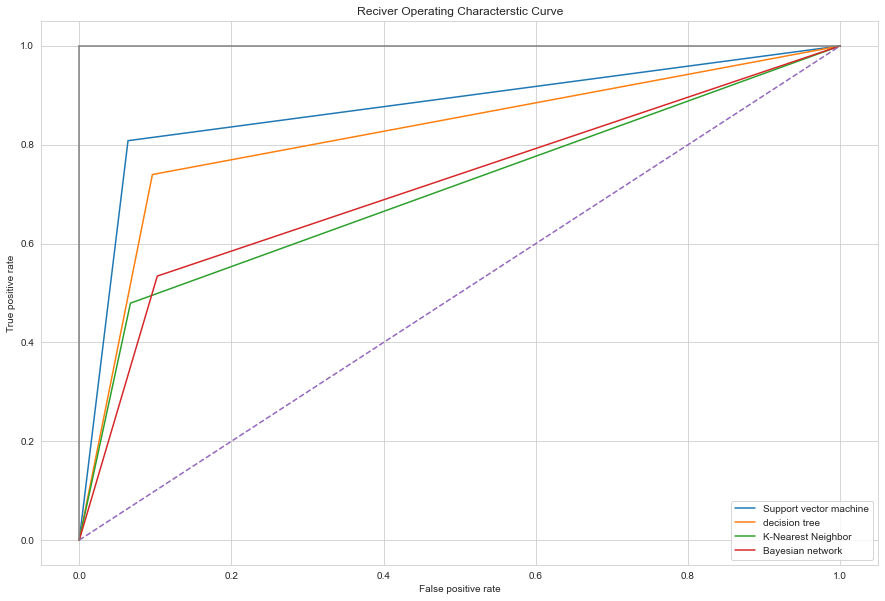

In [55]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(classifier_false_positive_rate,classifier_true_positive_rate,label='Support vector machine')
plt.plot(dtc_false_positive_rate,dtc_true_positive_rate,label='decision tree')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Bayesian network')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

# ACCURACY SCORES OF ALL ALGORITHMS

In [56]:
classifier=accuracy_score(y_test,classifier_pred)
dtc=accuracy_score(y_test,dtc_pred)
knn=accuracy_score(y_test,knn_pred)
nb=accuracy_score(y_test,nb_pred)

In [58]:
algo_accuracy = pd.DataFrame({'Model': ['Support vector machine','decision tree','K-Nearest Neighbor','Bayesian'], 'Accuracy': [dtc*100,
                    knn*100,classifier*100,nb*100]})
algo_accuracy

Model   Accuracy
0  Support vector machine  87.272727
1           decision tree  84.675325
2      K-Nearest Neighbor  91.168831
3                Bayesian  82.857143